In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
n = 20                      # Define sequence length
segment_lengths = [10, 10]  # Define the segment lengths, which should sum to n
means = [0, 0.4]              # Define the mean value for each segment

sequence = []
for length, mean in zip(segment_lengths, means):                    # Loop through each segment length and mean
    segment = np.random.normal(loc=mean, scale=0.1, size=length)    # Generate a segment with the specified mean and add noise
    sequence.extend(segment)                                        # Add this segment to the sequence

sequence = np.array(sequence)

In [3]:
changepoints = np.cumsum(segment_lengths)[:-1]-1

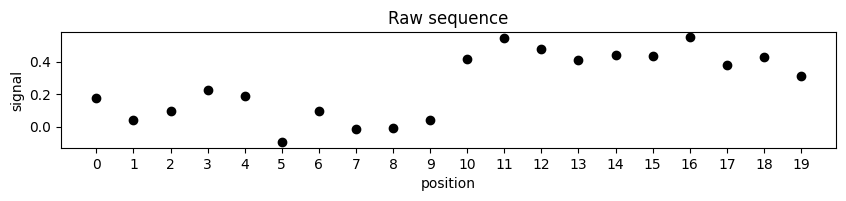

In [4]:
plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, color="black")  # Plot the generated sequence

# Title and labels
plt.title("Raw sequence")  # Add a title
plt.xlabel("position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("signal")  # Label y-axis

plt.show()  # Display the plot

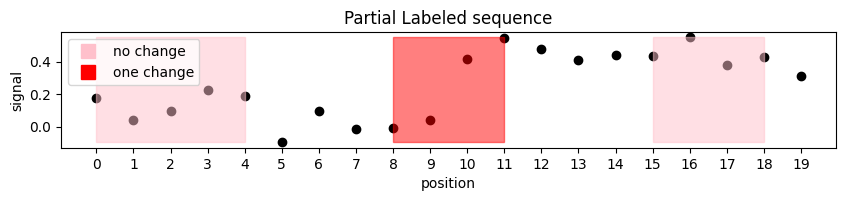

In [5]:
# Define the start and end positions for the rectangles
pink_start = [0, 15]
pink_end   = [4, 18]
red_start  = [8]
red_end    = [11]

plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, color="black")  # Plot the generated sequence

# Get min and max of sequence
seq_min = sequence.min()
seq_max = sequence.max()

# Add pink rectangles and create a legend handle
pink_patch = plt.Line2D([0], [0], marker='s', color='pink', label='no change', markersize=10, linestyle='None')
for start, end in zip(pink_start, pink_end):
    plt.gca().add_patch(plt.Rectangle((start, seq_min), end - start, seq_max - seq_min, color='pink', alpha=0.5))

# Add red rectangles and create a legend handle
red_patch = plt.Line2D([0], [0], marker='s', color='red', label='one change', markersize=10, linestyle='None')
for start, end in zip(red_start, red_end):
    plt.gca().add_patch(plt.Rectangle((start, seq_min), end - start, seq_max - seq_min, color='red', alpha=0.5))

# Title and labels
plt.title("Partial Labeled sequence")  # Add a title
plt.xlabel("position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("signal")  # Label y-axis
plt.legend(handles=[pink_patch, red_patch])

plt.show()  # Display the plot

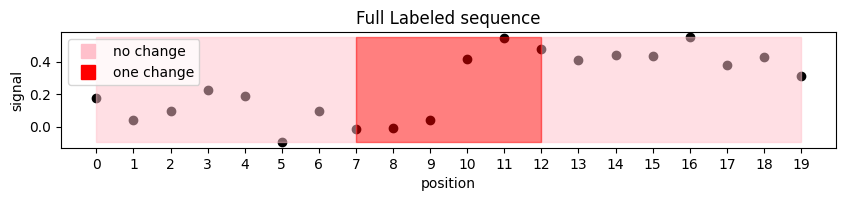

In [6]:
# Define the start and end positions for the rectangles
pink_start = [0, 12]
pink_end   = [7, 19]
red_start  = [7]
red_end    = [12]

plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, color="black")  # Plot the generated sequence

# Get min and max of sequence
seq_min = sequence.min()
seq_max = sequence.max()

# Add pink rectangles and create a legend handle
pink_patch = plt.Line2D([0], [0], marker='s', color='pink', label='no change', markersize=10, linestyle='None')
for start, end in zip(pink_start, pink_end):
    plt.gca().add_patch(plt.Rectangle((start, seq_min), end - start, seq_max - seq_min, color='pink', alpha=0.5))

# Add red rectangles and create a legend handle
red_patch = plt.Line2D([0], [0], marker='s', color='red', label='one change', markersize=10, linestyle='None')
for start, end in zip(red_start, red_end):
    plt.gca().add_patch(plt.Rectangle((start, seq_min), end - start, seq_max - seq_min, color='red', alpha=0.5))

# Title and labels
plt.title("Full Labeled sequence")  # Add a title
plt.xlabel("position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("signal")  # Label y-axis
plt.legend(handles=[pink_patch, red_patch])

plt.show()  # Display the plot

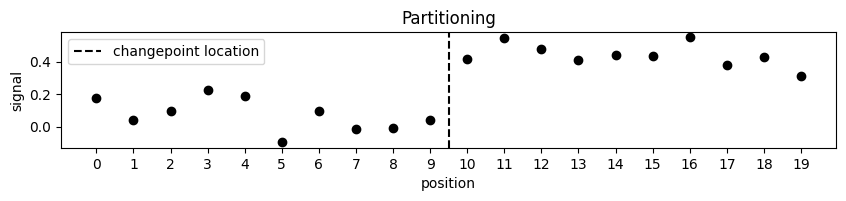

In [7]:
plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, color="black")  # Plot the generated sequence

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(x=changepoint+0.5, color='black', linestyle='--', label='changepoint location')  # Add vertical lines at changepoints

# Title and labels
plt.title("Partitioning")  # Add a title
plt.xlabel("position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("signal")  # Label y-axis
plt.legend()

plt.show()  # Display the plot

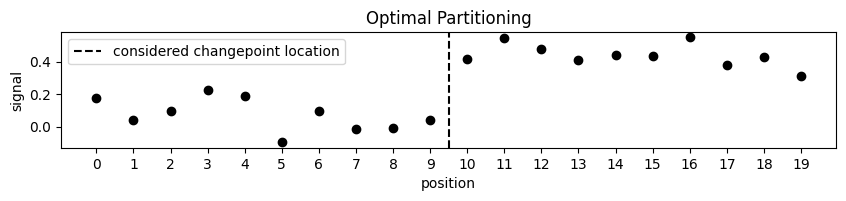

In [8]:
plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, color="black")  # Plot the generated sequence

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(x=changepoint+0.5, color='black', linestyle='--', label='considered changepoint location')  # Add vertical lines at changepoints

# Title and labels
plt.title("Optimal Partitioning")  # Add a title
plt.xlabel("position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("signal")  # Label y-axis
plt.legend()

plt.show()  # Display the plot

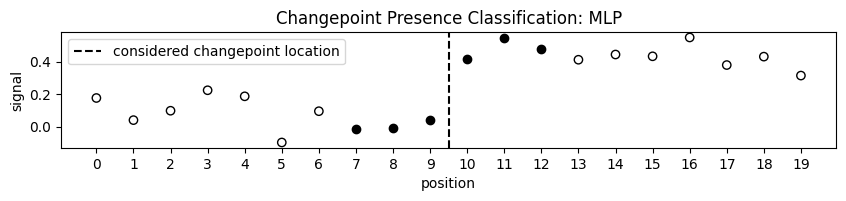

In [9]:
# Create figure
plt.figure(figsize=(10, 1.5))

# Loop over each changepoint to handle solid and hollow points
for changepoint in changepoints:
    left = max(changepoint - 2, 0)  # Ensure we don't go below 0
    right = min(changepoint + 4, n)  # Ensure we don't go above n

    # Plot solid points (left of changepoint, right of changepoint)
    plt.scatter(np.arange(left, right), sequence[left:right], color="black")

    # Plot hollow points (for other points)
    left_hollow = range(0, left)  # Left of the first region
    right_hollow = range(right, n)  # Right of the last region
    plt.scatter(left_hollow, sequence[left_hollow], facecolors='none', edgecolors='black')
    plt.scatter(right_hollow, sequence[right_hollow], facecolors='none', edgecolors='black')

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(x=changepoint+0.5, color='black', linestyle='--', label='considered changepoint location')

# Title and labels
plt.title("Changepoint Presence Classification: MLP")
plt.xlabel("position")
plt.xticks(np.arange(n))
plt.ylabel("signal")
plt.legend()

plt.show()

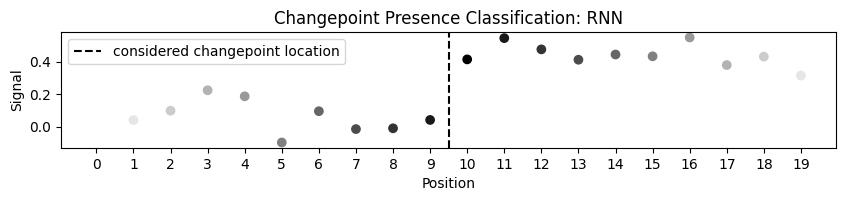

In [10]:
# Calculate the distance to the nearest changepoint for each point
distances = np.array([min(abs(i - changepoint - 1) for changepoint in changepoints) for i in range(n)])

# Normalize distances to range [0, 1] for color mapping
normalized_distances = distances / distances.max()

# Create a reversed colormap from black (nearer to changepoint) to white (farther from changepoint)
cmap = plt.get_cmap("binary_r")

# Plot the sequence with colors based on distance to nearest changepoint
plt.figure(figsize=(10, 1.5))
plt.scatter(np.arange(n), sequence, c=normalized_distances, cmap=cmap)  # Color points by normalized distance

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(x=changepoint+0.5, color='black', linestyle='--', label='considered changepoint location')  # Add vertical lines at changepoints

# Title and labels
plt.title("Changepoint Presence Classification: RNN")  # Add a title
plt.xlabel("Position")  # Label x-axis
plt.xticks(np.arange(n))
plt.ylabel("Signal")  # Label y-axis
plt.legend()

plt.show()  # Display the plot